### Pre-processing data for the analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
dt = pd.read_excel('RiskSpanSkillsAssessment.xlsx', sheet_name='Data')

print(dt.shape)
print(dt.dtypes)
dt.head()

(2000, 29)
LOAN_NUMBER                              int64
SAMPLE_DATE                     datetime64[ns]
FILE_REQ_DATE                   datetime64[ns]
SECOND_REQUEST_DATE             datetime64[ns]
SENT_TO_IMAGING_DATE            datetime64[ns]
LENDER_RESPONSE_DUE_DATE        datetime64[ns]
DATE_LOAN_FINALIZED             datetime64[ns]
LENDER_ID                               object
LENDER_NAME                             object
LENDER_LOAN_ID                          object
PROP_STATE                              object
NEW_CONSTRUCTION_INDICATOR              object
CONDOMINIUM_INDICATOR                   object
LOAN_ORIG_DATE                  datetime64[ns]
CURRENT_BALANCE                          int64
FICO_SCORE                               int64
LTV                                    float64
ORIG_VALUE                             float64
AVM_VALUE                              float64
FIELD_REVIEW_VALUE_SUPPORTED            object
FIELD_REVIEW_VALUE                     float64
PU

,LOAN_NUMBER,SAMPLE_DATE,FILE_REQ_DATE,SECOND_REQUEST_DATE,SENT_TO_IMAGING_DATE,LENDER_RESPONSE_DUE_DATE,DATE_LOAN_FINALIZED,LENDER_ID,LENDER_NAME,LENDER_LOAN_ID,...,FIELD_REVIEW_VALUE_SUPPORTED,FIELD_REVIEW_VALUE,PURPOSE_CODE,OCCUPANCY_CODE,LENDER_INST_TYPE_DESCRIPTION,UNDERWRITER_NAME,REVIEW_DATE,REVIEW_STATUS,DEAL_NAME,START_DATE
0,19457569,2010-11-22,2010-11-25,NaT,NaT,NaT,2011-01-24,ZMFHQJ,"Wells Fargo Bank, N.A.",26291118,...,NaN,NaN,P,B,Bank Owned Mortgage Company - National,Mike Willams,2011-01-13,4.0,WFMBS 2006-5,2013-06-01
1,16864087,2012-04-03,2012-04-05,2012-04-20,NaT,NaT,2012-04-24,NXYFBZ,"Wells Fargo Bank, N.A.",381247287,...,NaN,NaN,R,B,Bank Owned Mortgage Company - National,Mike Willams,2012-04-23,4.0,WFMBS 2006-AR4,2013-06-01
2,17137579,2012-06-27,2012-06-27,NaT,2012-07-13,NaT,2012-07-20,CKZGQU,Cobalt Mortgage Inc,38200028,...,NaN,NaN,P,B,Mortgage Banker - Bank Owned,Mike Willams,2012-07-20,4.0,WFMBS 2006-AR4,2013-06-01
3,20382551,2012-10-08,2012-10-11,NaT,2012-10-26,NaT,2012-12-10,DMYYBZ,McLean Mortgage Corporation,416297794,...,NaN,NaN,P,B,Mortgage Banker - Bank Owned,Eric Miller,2012-11-30,4.0,WFMBS 2006-5,2013-06-01
4,23078618,2012-10-04,2012-10-08,NaT,2012-10-22,NaT,2012-10-25,WIXLJR,LoanCare Servicing Center Inc,6967335,...,NaN,NaN,X,B,Mortgage Banker - (Large),Mike Willams,2012-10-23,4.0,WFMBS 2006-5,2013-06-01


In [4]:
# Extracting only the columns necessary for the purpose of the analysis for convenience

dt = dt[['LOAN_NUMBER', 'LENDER_INST_TYPE_DESCRIPTION', 'LOAN_ORIG_DATE', 'CURRENT_BALANCE', 'FICO_SCORE', 'LTV', 'START_DATE']]
print(dt.shape)
dt.head()

(2000, 7)


,LOAN_NUMBER,LENDER_INST_TYPE_DESCRIPTION,LOAN_ORIG_DATE,CURRENT_BALANCE,FICO_SCORE,LTV,START_DATE
0,19457569,Bank Owned Mortgage Company - National,2010-08-24,247050,111,90.000000,2013-06-01
1,16864087,Bank Owned Mortgage Company - National,2011-10-26,119000,620,85.000000,2013-06-01
2,17137579,Mortgage Banker - Bank Owned,2012-04-30,315000,629,90.000000,2013-06-01
3,20382551,Mortgage Banker - Bank Owned,2012-07-18,303050,636,95.000000,2013-06-01
4,23078618,Mortgage Banker - (Large),2012-05-15,120000,638,84.510002,2013-06-01


In [5]:
dt.dtypes

LOAN_NUMBER                              int64
LENDER_INST_TYPE_DESCRIPTION            object
LOAN_ORIG_DATE                  datetime64[ns]
CURRENT_BALANCE                          int64
FICO_SCORE                               int64
LTV                                    float64
START_DATE                      datetime64[ns]
dtype: object

_Binning (grouping cohorts)  - LTV, Loan age, FICO score_

In [6]:
def binning_ltv(ltv):
    if ltv <= 85:
        return '<= 85%'
    elif ltv <= 90:
        return '> 85% and <= 90%'
    elif ltv <= 95:
        return '> 90% and <= 95%'
    else:
        return '> 95%'
    
def binning_loan_age(age):
    if age >= 40: 
        return '>= 40 Months'
    elif age >= 30:
        return '30 - 39 Months'
    elif age >= 20:
        return '20 - 29 Months'
    elif age >= 10:
        return '10 - 19 Months'
    elif age >= 0:
        return '0 - 9 Months'
    else:
        return 'Unknown'
    
def binning_FICO(score):
    if score >= 800:
        return '>= 800'
    elif score >= 700:
        return '< 700-799'
    elif score >= 600:
        return '< 600-699'
    else:
        return '< 600'

def convert_days_to_months(row):
    return (row['START_DATE'].month - row['LOAN_ORIG_DATE'].month) \
            + (row['START_DATE'].year - row['LOAN_ORIG_DATE'].year)*12

In [7]:
dt['LTV_BIN'] = dt['LTV'].map(binning_ltv)
dt['LOAN_AGE'] = dt[['START_DATE', 'LOAN_ORIG_DATE']].apply(convert_days_to_months, axis=1)
dt['LOAN_AGE_BIN'] = dt['LOAN_AGE'].map(binning_loan_age)
dt['FICO_SCORE_BIN'] = dt['FICO_SCORE'].map(binning_FICO)

In [8]:
dt.head()

,LOAN_NUMBER,LENDER_INST_TYPE_DESCRIPTION,LOAN_ORIG_DATE,CURRENT_BALANCE,FICO_SCORE,LTV,START_DATE,LTV_BIN,LOAN_AGE,LOAN_AGE_BIN,FICO_SCORE_BIN
0,19457569,Bank Owned Mortgage Company - National,2010-08-24,247050,111,90.000000,2013-06-01,> 85% and <= 90%,34.0,30 - 39 Months,< 600
1,16864087,Bank Owned Mortgage Company - National,2011-10-26,119000,620,85.000000,2013-06-01,<= 85%,20.0,20 - 29 Months,< 600-699
2,17137579,Mortgage Banker - Bank Owned,2012-04-30,315000,629,90.000000,2013-06-01,> 85% and <= 90%,14.0,10 - 19 Months,< 600-699
3,20382551,Mortgage Banker - Bank Owned,2012-07-18,303050,636,95.000000,2013-06-01,> 90% and <= 95%,11.0,10 - 19 Months,< 600-699
4,23078618,Mortgage Banker - (Large),2012-05-15,120000,638,84.510002,2013-06-01,<= 85%,13.0,10 - 19 Months,< 600-699


### REPORT 1: Data by Lender Institution Type

In [9]:
df1 = dt.groupby('LENDER_INST_TYPE_DESCRIPTION')[['LOAN_NUMBER']].count()
df1

,LOAN_NUMBER
LENDER_INST_TYPE_DESCRIPTION,
Bank Owned Mortgage Company - National,187
Community Banks,499
Credit Unions,374
Mortgage Banker - (Large),279
Mortgage Banker - Bank Owned,661


In [10]:
df2 = dt.groupby('LENDER_INST_TYPE_DESCRIPTION')['CURRENT_BALANCE'].agg([np.mean, np.max, np.min])
df2

,mean,amax,amin
LENDER_INST_TYPE_DESCRIPTION,,,
Bank Owned Mortgage Company - National,242899.802139,720000,43225
Community Banks,211839.963928,729750,28500
Credit Unions,175149.601604,578250,22500
Mortgage Banker - (Large),260374.383513,729750,59000
Mortgage Banker - Bank Owned,236262.689864,625500,25018


In [11]:
df3 = pd.merge(df1, df2, left_index=True, right_index=True)
df3.columns = ['Loan Count', 'Average Current Balance', 'Max Current Balance', 'Min Current Balance']
result_df_1 = df3
result_df_1

,Loan Count,Average Current Balance,Max Current Balance,Min Current Balance
LENDER_INST_TYPE_DESCRIPTION,,,,
Bank Owned Mortgage Company - National,187,242899.802139,720000,43225
Community Banks,499,211839.963928,729750,28500
Credit Unions,374,175149.601604,578250,22500
Mortgage Banker - (Large),279,260374.383513,729750,59000
Mortgage Banker - Bank Owned,661,236262.689864,625500,25018


### REPORT 2: Data by LTV (Loan to Value) Cohorts

In [12]:
df1 = dt.groupby('LTV_BIN')[['LOAN_NUMBER']].count()
df1

,LOAN_NUMBER
LTV_BIN,
<= 85%,344
> 85% and <= 90%,823
> 90% and <= 95%,796
> 95%,37


In [13]:
df2 = dt.groupby('LTV_BIN')['CURRENT_BALANCE'].agg([np.mean, np.max, np.min])
df2

,mean,amax,amin
LTV_BIN,,,
<= 85%,223985.912791,729750,43300
> 85% and <= 90%,235966.178615,729750,22500
> 90% and <= 95%,209504.335427,561700,28500
> 95%,200910.189189,371510,65475


In [14]:
df3 = pd.merge(df1, df2, left_index=True, right_index=True)
df3.columns = ['Loan Count', 'Average Current Balance', 'Max Current Balance', 'Min Current Balance']
result_df_2 = df3
result_df_2

,Loan Count,Average Current Balance,Max Current Balance,Min Current Balance
LTV_BIN,,,,
<= 85%,344,223985.912791,729750,43300
> 85% and <= 90%,823,235966.178615,729750,22500
> 90% and <= 95%,796,209504.335427,561700,28500
> 95%,37,200910.189189,371510,65475


### REPORT 3: Data by Loan Age Cohort

In [15]:
df1 = dt.groupby('LOAN_AGE_BIN')[['LOAN_NUMBER']].count()
df1

,LOAN_NUMBER
LOAN_AGE_BIN,
0 - 9 Months,242
10 - 19 Months,724
20 - 29 Months,564
30 - 39 Months,268
>= 40 Months,186
Unknown,16


In [16]:
df2 = dt.groupby('LOAN_AGE_BIN')['CURRENT_BALANCE'].agg([np.mean, np.max, np.min])
df2

,mean,amax,amin
LOAN_AGE_BIN,,,
0 - 9 Months,233615.673554,562500,45000
10 - 19 Months,229611.947514,720000,25018
20 - 29 Months,216680.785461,729750,22500
30 - 39 Months,204076.171642,546376,41705
>= 40 Months,224049.580645,729750,35000
Unknown,256425.312500,404700,88065


In [17]:
df3 = pd.merge(df1, df2, left_index=True, right_index=True)
df3.columns = ['Loan Count', 'Average Current Balance', 'Max Current Balance', 'Min Current Balance']
result_df_3 = df3
result_df_3

,Loan Count,Average Current Balance,Max Current Balance,Min Current Balance
LOAN_AGE_BIN,,,,
0 - 9 Months,242,233615.673554,562500,45000
10 - 19 Months,724,229611.947514,720000,25018
20 - 29 Months,564,216680.785461,729750,22500
30 - 39 Months,268,204076.171642,546376,41705
>= 40 Months,186,224049.580645,729750,35000
Unknown,16,256425.312500,404700,88065


### REPORT 4: Create a Crosstab Report- SUM of CURRENT_UPB by LTV Cohorts and FICO Cohorts

In [18]:
result_df_4 = pd.crosstab(dt['FICO_SCORE_BIN'], dt['LTV_BIN'], values=dt['CURRENT_BALANCE'], aggfunc='sum').fillna(0)
result_df_4

LTV_BIN,<= 85%,> 85% and <= 90%,> 90% and <= 95%,> 95%
FICO_SCORE_BIN,,,,
< 600,0.0,247050.0,0.0,0.0
< 600-699,3260490.0,14606019.0,14598016.0,629990.0
< 700-799,60413630.0,149979009.0,135188314.0,5359114.0
>= 800,13377034.0,29368087.0,16979121.0,1444573.0


### REPORT 5: Create a bar graph of Report 4

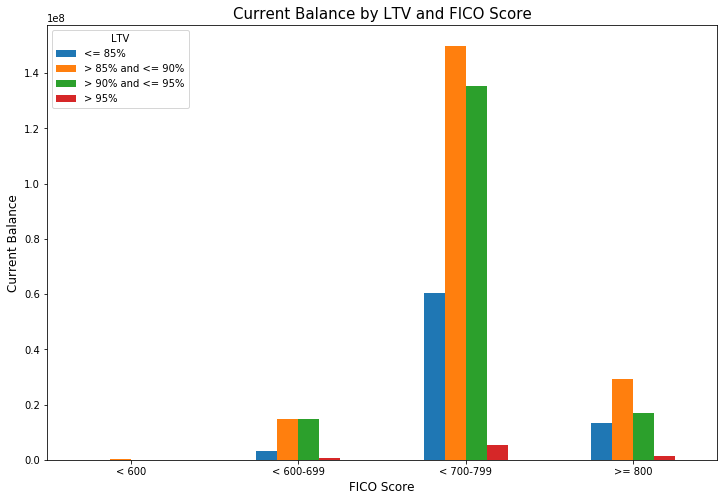

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
result_df_4.plot(kind='bar', figsize=(12, 8), ax=ax)
ax.set_title('Current Balance by LTV and FICO Score', fontsize=15)
ax.set_xlabel('FICO Score', fontsize=12)
plt.xticks(rotation='horizontal')
ax.set_ylabel('Current Balance', fontsize=12)
ax.legend(title='LTV', loc='upper left')
plt.show()

fig.savefig('plotimage.png')

### Exporting final dataframes and graph into an excel file

In [20]:
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')

result_df_1.to_excel(writer, sheet_name='Sheet1')
result_df_2.to_excel(writer, sheet_name='Sheet1', startrow=7)
result_df_3.to_excel(writer, sheet_name='Sheet1', startrow=13)
result_df_4.to_excel(writer, sheet_name='Sheet1', startrow=21)
writer.sheets['Sheet1'].insert_image('A28', 'plotimage.png', {'x_scale': 0.5, 'y_scale': 0.5})
writer.close()